In [1]:
import numpy
from matplotlib import pyplot
from matplotlib import rcParams
%matplotlib inline
rcParams['font.family']='serif'
rcParams['font.size']= 16

In [2]:
#constants
gamma = 1.4
rho_L = 1    #[kg/m^3]
v_L = 0    #[m/s]
p_L = 100000    #[N/m^2]
rho_R = 0.125    #[kg/m^2]
v_R = 0     #[m/s]
p_R = 10000    #[N/m^2]
et_L = 0.5*v_L**2 + p_L/((gamma-1)*rho_L)
et_R = 0.5*v_R**2 + p_R/((gamma-1)*rho_R)

In [3]:
def initu(nx):
    u = numpy.zeros((3,nx))
    u[0,:(nx/2)] = rho_L
    u[1,:(nx/2)] = rho_L*v_L
    u[2,:(nx/2)] = rho_L*et_L
    u[0,(nx/2):] = rho_R
    u[1,(nx/2):] = rho_R*v_L
    u[2,(nx/2):] = rho_R*et_R
    return u   

In [4]:
def computeF(u):
    u1 = u[0,:]
    u2 = u[1,:]
    u3 = u[2,:]
    return numpy.array([u2, u2**2/u1 +(gamma-1)*(u3-(1/2*u2**2/u1)), (u3+(gamma-1)*(u3 - (1/2*u2**2/u1)))*u2/u1])

In [41]:
def richtmeyer(u, nt, dt, dx):
    u_n = numpy.zeros((nt,len(u),nx))
    u_star = numpy.zeros_like(u)
    u_n[:,:,:] = u.copy()
    u_star[:,:] = u.copy()
    
    for t in range(1,nt):
        F = computeF(u)
        u_star[:,:-1] = 0.5*(u[:,1:]+u[:,:-1])- dt/(2*dx)*(F[:,1:]-F[:,:-1])
        F_star = computeF(u_star)
        u_n[t,:,1:-1] = u[:,1:-1] - dt/dx*(F_star[:,1:-1]-F_star[:,:-2])
        
        u = u_n[t,:,:].copy()
    return u_n

In [42]:
t = 0.01
nx = 81
dx = 0.25
dt = 0.0002
x = numpy.linspace(-10,10,nx)
sigma = 1
nt = int(t/dt)+1

In [43]:
u =initu(nx)

In [44]:
computeF(u)

array([[      0.,       0.,       0.,       0.,       0.,       0.,
              0.,       0.,       0.,       0.,       0.,       0.,
              0.,       0.,       0.,       0.,       0.,       0.,
              0.,       0.,       0.,       0.,       0.,       0.,
              0.,       0.,       0.,       0.,       0.,       0.,
              0.,       0.,       0.,       0.,       0.,       0.,
              0.,       0.,       0.,       0.,       0.,       0.,
              0.,       0.,       0.,       0.,       0.,       0.,
              0.,       0.,       0.,       0.,       0.,       0.,
              0.,       0.,       0.,       0.,       0.,       0.,
              0.,       0.,       0.,       0.,       0.,       0.,
              0.,       0.,       0.,       0.,       0.,       0.,
              0.,       0.,       0.,       0.,       0.,       0.,
              0.,       0.,       0.],
       [ 100000.,  100000.,  100000.,  100000.,  100000.,  100000.,
         

In [45]:
u_n=richtmeyer(u, nt, dt,dx)

In [47]:
u_n[nt-1,0,:]

array([ 1.        ,  1.        ,  1.        ,  1.        ,  1.        ,
        1.        ,  1.        ,  1.        ,  1.        ,  1.        ,
        1.        ,  1.        ,  0.99999997,  0.99999986,  0.99999932,
        0.99999694,  0.99998741,  0.9999526 ,  0.99983736,  0.99949289,
        0.99856792,  0.99635019,  0.99162823,  0.98273521,  0.96792076,
        0.94600154,  0.9168774 ,  0.88164814,  0.84208594,  0.80012107,
        0.75730048,  0.71481491,  0.67277761,  0.63389053,  0.59052577,
        0.56181242,  0.51598546,  0.48995123,  0.44887417,  0.44760904,
        0.29696558,  0.36126796,  0.43359314,  0.42699377,  0.41099442,
        0.41892596,  0.44399618,  0.46434585,  0.45696901,  0.42194861,
        0.3746914 ,  0.3317037 ,  0.30204312,  0.28704464,  0.280923  ,
        0.27230546,  0.25570383,  0.24516403,  0.26061836,  0.29707243,
        0.30148605,  0.2238121 ,  0.14723687,  0.12725797,  0.1251773 ,
        0.12501369,  0.12500107,  0.12500009,  0.12500001,  0.12

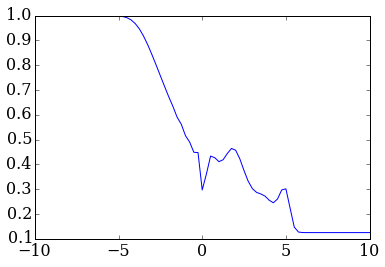

In [48]:
pyplot.plot(x,u_n[nt-1,0,:])

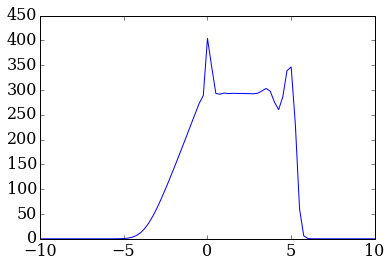

In [57]:
pyplot.plot(x,u_n[nt-1,1,:]/u_n[nt-1,0,:])

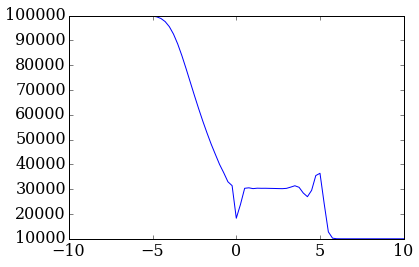

In [60]:
pyplot.plot(x,(gamma-1)*(u_n[nt-1,2,:] - 0.5*(u_n[nt-1,1,:])**2/u_n[nt-1,0,:]))

In [50]:
numpy.where(x==2.5)

(array([50]),)

In [51]:
dens = u_n[nt-1,0,:]

In [52]:
dens[50]

0.37469140264760109

In [53]:
vel = u_n[nt-1,1,:]/u_n[nt-1,0,:]

In [54]:
vel[50]

292.61147152682679

In [58]:
pres=(gamma-1)*(u_n[nt-1,2,:] - 0.5*(u_n[nt-1,1,:])**2/u_n[nt-1,0,:])

In [59]:
pres[50]

30250.890167572015